# About NLP

In [1]:
'''Natural Language Processing (or NLP) is applying Machine Learning models to text and language. Teaching machines to understand what is said in spoken and written word is the focus of Natural Language Processing. Whenever you dictate something into your iPhone / Android device that is then converted to text, that’s an NLP algorithm in action.

You can also use NLP on a text review to predict if the review is a good one or a bad one. You can use NLP on an article to predict some categories of the articles you are trying to segment. You can use NLP on a book to predict the genre of the book. And it can go further, you can use NLP to build a machine translator or a speech recognition system, and in that last example you use classification algorithms to classify language. Speaking of classification algorithms, most of NLP algorithms are classification models, and they include Logistic Regression, Naive Bayes, CART which is a model based on decision trees, Maximum Entropy again related to Decision Trees, Hidden Markov Models which are models based on Markov processes.

A very well-known model in NLP is the Bag of Words model. It is a model used to preprocess the texts to classify before fitting the classification algorithms on the observations containing the texts.

In this part, you will understand and learn how to:

Clean texts to prepare them for the Machine Learning models,
Create a Bag of Words model,
Apply Machine Learning models onto this Bag of Worlds model.'''


'Natural Language Processing (or NLP) is applying Machine Learning models to text and language. Teaching machines to understand what is said in spoken and written word is the focus of Natural Language Processing. Whenever you dictate something into your iPhone / Android device that is then converted to text, that’s an NLP algorithm in action.\n\nYou can also use NLP on a text review to predict if the review is a good one or a bad one. You can use NLP on an article to predict some categories of the articles you are trying to segment. You can use NLP on a book to predict the genre of the book. And it can go further, you can use NLP to build a machine translator or a speech recognition system, and in that last example you use classification algorithms to classify language. Speaking of classification algorithms, most of NLP algorithms are classification models, and they include Logistic Regression, Naive Bayes, CART which is a model based on decision trees, Maximum Entropy again related to

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)


In [4]:
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


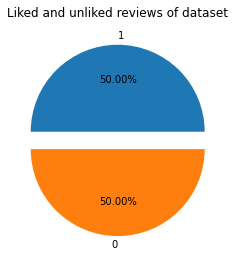

In [5]:
plt.pie(dataset.Liked.value_counts(),
        labels=dataset.Liked.value_counts().index,
       autopct='%1.2f%%',
       explode=[0,0.2])#autopct is for percentage in piechart
plt.title('Liked and unliked reviews of dataset')

plt.show()

In [6]:
x=dataset.iloc[:,:-1].values
x

array([['Wow... Loved this place.'],
       ['Crust is not good.'],
       ['Not tasty and the texture was just nasty.'],
       ['Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'],
       ['The selection on the menu was great and so were the prices.'],
       ['Now I am getting angry and I want my damn pho.'],
       ["Honeslty it didn't taste THAT fresh.)"],
       ['The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.'],
       ['The fries were great too.'],
       ['A great touch.'],
       ['Service was very prompt.'],
       ['Would not go back.'],
       ['The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.'],
       ['I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!'],
       ['I was disgusted because I was pretty sure that was human hair.'],
       ['I was shocked because no signs indicate cash only.'],
       ['Highly r

In [7]:
y=dataset.iloc[:,-1].values
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

# cleaning the dataset

In [8]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer#porter is a sub module of stem
corpus=[]
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]',' ',dataset['Review'][i])#re is a library
    review = review.lower()
    review = review.split( )
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review=[ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pendlimarri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In [10]:
# CountVectorizer

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# KNeighborsClassifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[72 25]
 [44 59]]


0.655

# GaussianNB

In [15]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB()

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred1 = gaussian.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
print(cm)
accuracy_score(y_test, y_pred1)

[[55 42]
 [12 91]]


0.73

# DecisionTreeClassifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
decisiontree=DecisionTreeClassifier(criterion='entropy',random_state=0)
decisiontree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred2 = decisiontree.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[78 19]
 [31 72]]


0.75

# RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
randomforest.fit(X_train,y_train)



RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred3 = randomforest.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)

[[87 10]
 [45 58]]


0.725

In [21]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = xgboost.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[81 16]
 [40 63]]


0.72

In [23]:
y_pred=xgboost.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]

# For a single review

In [42]:
new_review = 'delicious food'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[1]


In [43]:
new_corpus

['delici food']